## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (18, 6)
colors_R = sns.color_palette('Reds')
colors_B = sns.color_palette('pastel')
palette = ["#0EB8F1", "#F1480F"]
palette_r = 'Reds'
palette_b = 'Blues'
palette_light = 'pastel'
palette_dark = 'seismic'


pd.set_option('display.max_columns',100)

import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

In [3]:
center_df = pd.read_csv('fulfilment_center_info.csv')
meal_df = pd.read_csv('meal_info.csv')
train_df = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test_QoiMO9B.csv')

### Understanding the dataset

In [5]:
# meal data-set

meal_df.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
meal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [7]:
meal_df.describe()

,meal_id
count,51.000000
mean,2013.921569
std,553.633555
min,1062.000000
25%,1550.500000
50%,1971.000000
75%,2516.500000
max,2956.000000


In [8]:
# train data-set

train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [9]:
train_df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [11]:
# Center data-set

center_df.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [12]:
center_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [13]:
center_df.describe()

,center_id,city_code,region_code,op_area
count,77.000000,77.000000,77.000000,77.000000
mean,83.142857,600.662338,56.493506,3.985714
std,46.090219,66.720274,18.126473,1.106406
min,10.000000,456.000000,23.000000,0.900000
25%,50.000000,553.000000,34.000000,3.500000
50%,77.000000,596.000000,56.000000,3.900000
75%,110.000000,651.000000,77.000000,4.400000
max,186.000000,713.000000,93.000000,7.000000


##### Checking for duplicate data cells.

In [14]:
meal_df.duplicated().sum()

0

In [15]:
train_df.duplicated().sum()

0

In [16]:
center_df.duplicated().sum()

0

##### Checking for null data cells.

In [17]:
meal_df.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

In [18]:
train_df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [19]:
center_df.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

### Merging datasets

In [20]:
# merge train_df and center_df

df0 = pd.merge(train_df, center_df, how= 'inner', on="center_id")
df0.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0


In [21]:
# merge df1 and meal_df

df = pd.merge(df0,meal_df,how= 'inner', on='meal_id')
df.sample(6)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
144920,1133651,121,139,1727,423.95,423.95,0,0,231,693,34,TYPE_C,2.8,Rice Bowl,Indian
197483,1315971,4,67,2826,329.83,330.83,0,0,581,638,56,TYPE_B,7.0,Sandwich,Italian
103350,1440464,54,30,1207,288.09,445.23,0,1,485,604,56,TYPE_A,3.5,Beverages,Continental
241312,1002565,38,89,1558,437.47,726.53,1,1,959,703,56,TYPE_A,4.8,Pizza,Continental
52784,1493475,81,109,1248,155.26,153.26,0,0,82,599,56,TYPE_A,3.6,Beverages,Indian
274347,1079678,119,89,1445,689.73,689.73,0,0,94,703,56,TYPE_A,4.8,Seafood,Continental


In [22]:
df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

### Test data

In [23]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [24]:
# Merging test-data with center-data
test_df = pd.merge(test, center_df, how='inner', on='center_id')

# Merging test-data with meal-data
test_df = pd.merge(test_df, meal_df, how='inner', on='meal_id')

test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   city_code              32573 non-null  int64  
 9   region_code            32573 non-null  int64  
 10  center_type            32573 non-null  object 
 11  op_area                32573 non-null  float64
 12  category               32573 non-null  object 
 13  cuisine                32573 non-null  object 
dtypes: float64(3), int64(8), object(3)
memory usage: 3.7+ 

In [25]:
test_df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [26]:
def feature_dist_class(df, col):
    
    fig, axes = plt.subplots(1, 3, figsize = (20, 5))
    
    sns.histplot(x = col, data = df, ax = axes[0],palette = palette_b, edgecolor='black', linewidth=0.5)
    sns.kdeplot(x = col, data = df, fill = True, ax = axes[1], palette = palette_b, linewidth = 2)
    sns.boxplot(y = col, data = df, x = [""] * len(df), ax = axes[2], 
                palette = palette_b, linewidth = 2, flierprops = dict(marker = 'x', markersize = 3.5))
    
    fig.suptitle('For Feature:  ' + col)
    axes[0].set_title('Histogram For Feature ' + col)
    axes[1].set_title('KDE Plot For Feature ' + col)   
    axes[2].set_title('Boxplot For Feature ' + col)      
    
    for ax in axes:
        ax.set_facecolor('#e1ecfa')
        ax.grid(linewidth = 0.25)        

In [27]:
cont_names = ['checkout_price', 'base_price', 'num_orders']
obj_names = ['center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured',
             'city_code','region_code', 'center_type', 'op_area', 'category', 'cuisine']

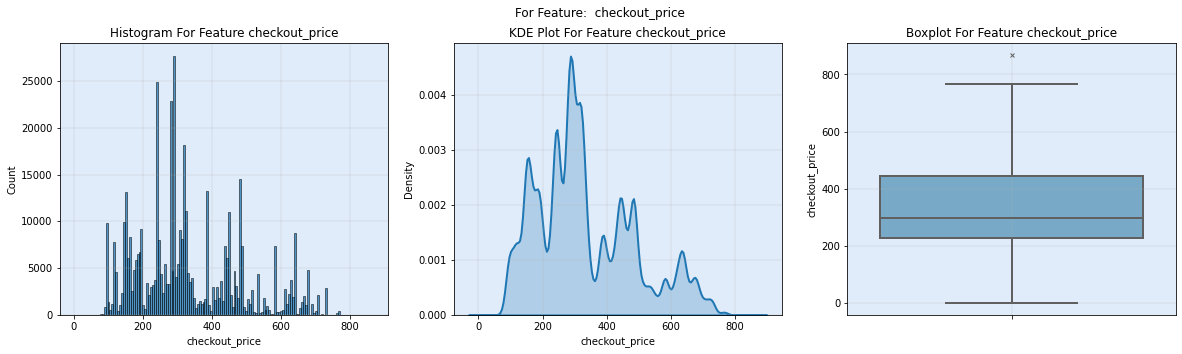

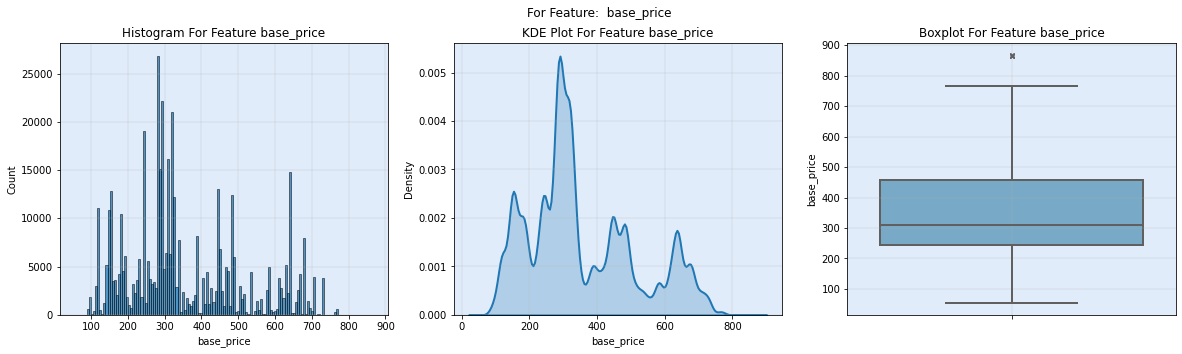

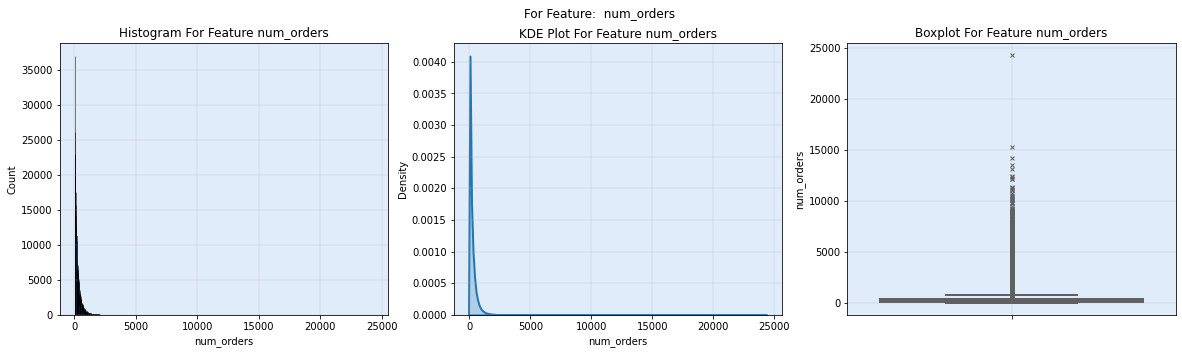

In [28]:
for col in cont_names:
    feature_dist_class(df, col)

##### num_orders data is right skewed, need to perform log transformations before using statistics based algorithms.


In [29]:
def count_percentage(df, col):
    
    plt.figure(figsize = (20, 5))
    ax = plt.gca()
    ax.set_facecolor('#e1ecfa')
    plt.grid(linewidth = 0.25)
    
    sns.countplot(x = col, data = df, palette = palette_r, edgecolor="black", linewidth=0.5)
    plt.xticks(rotation = 90)

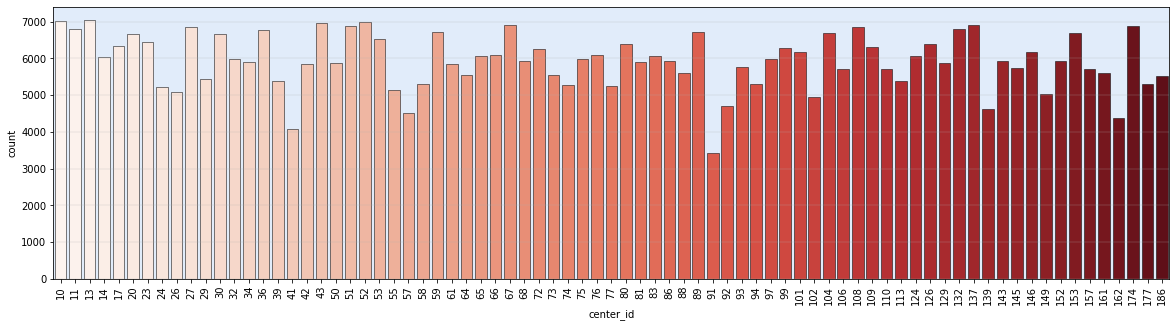

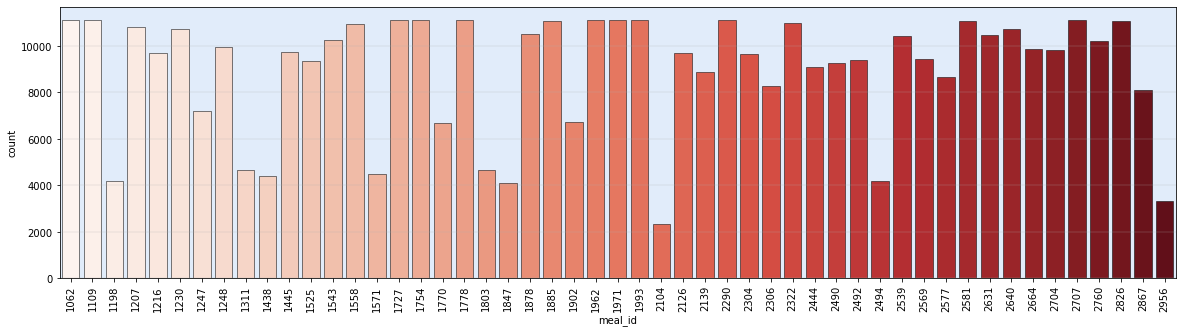

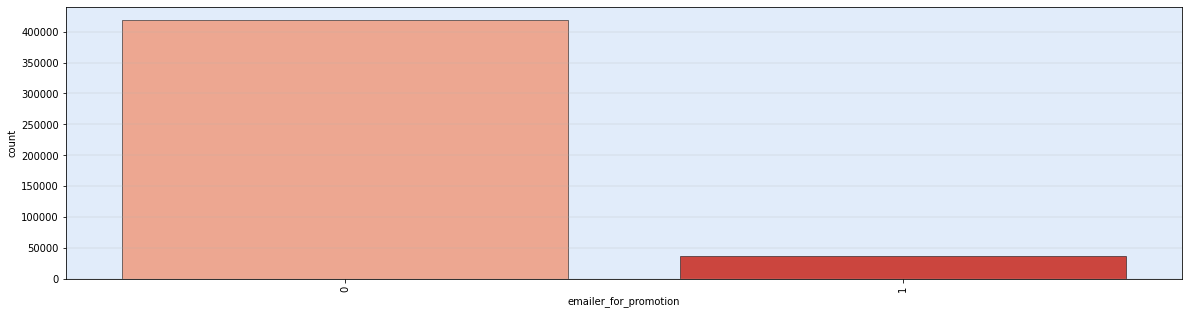

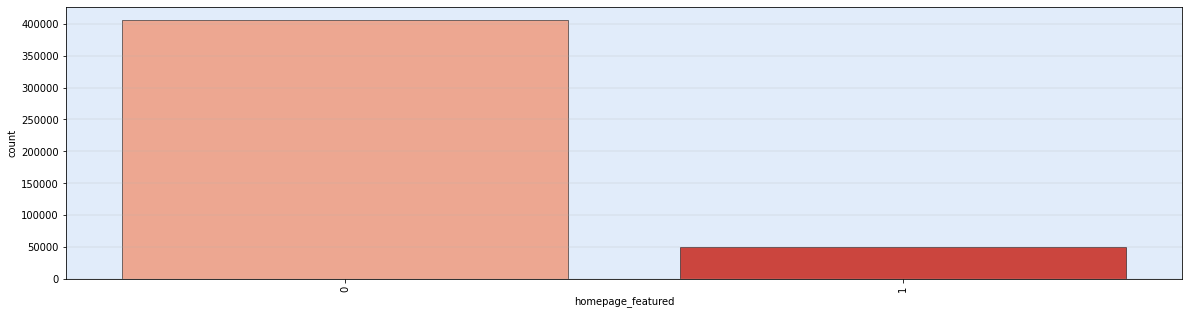

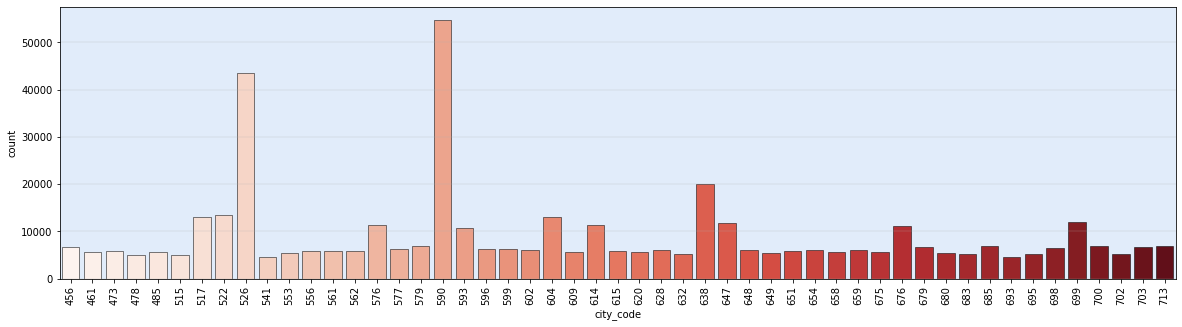

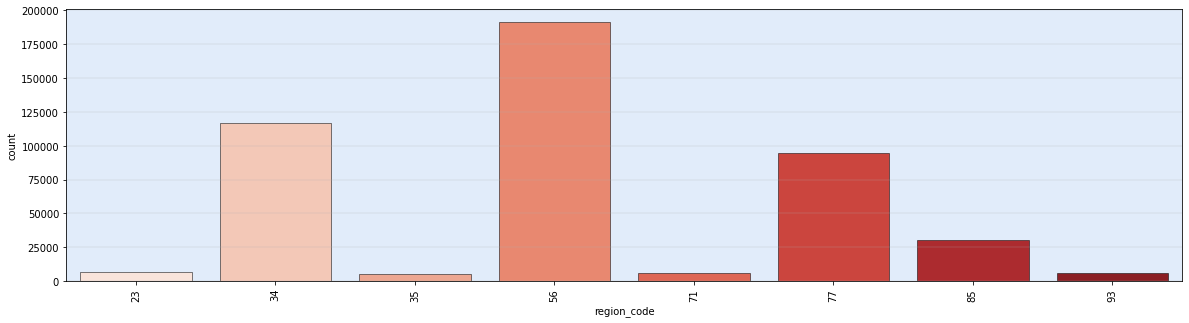

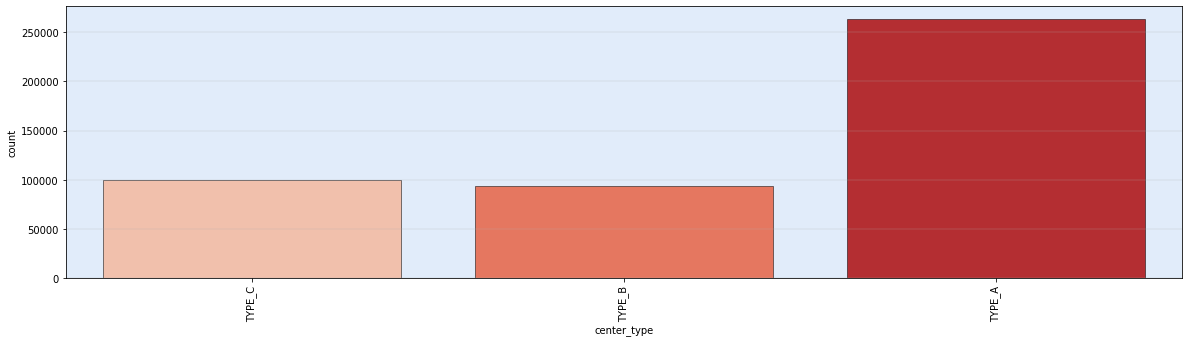

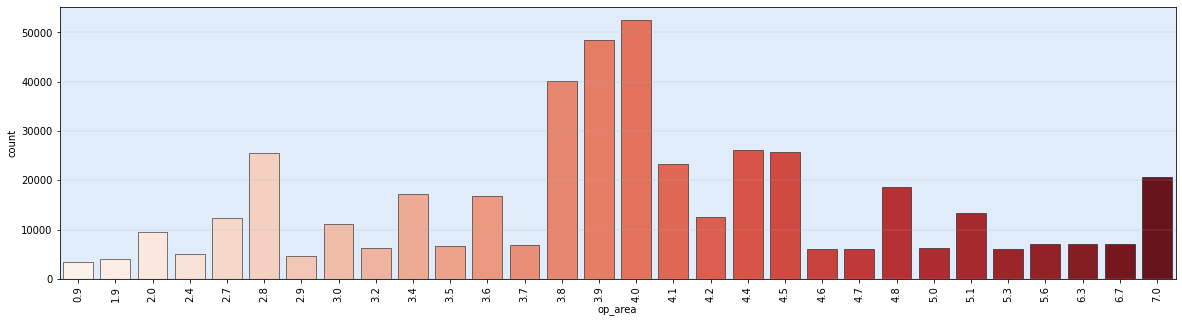

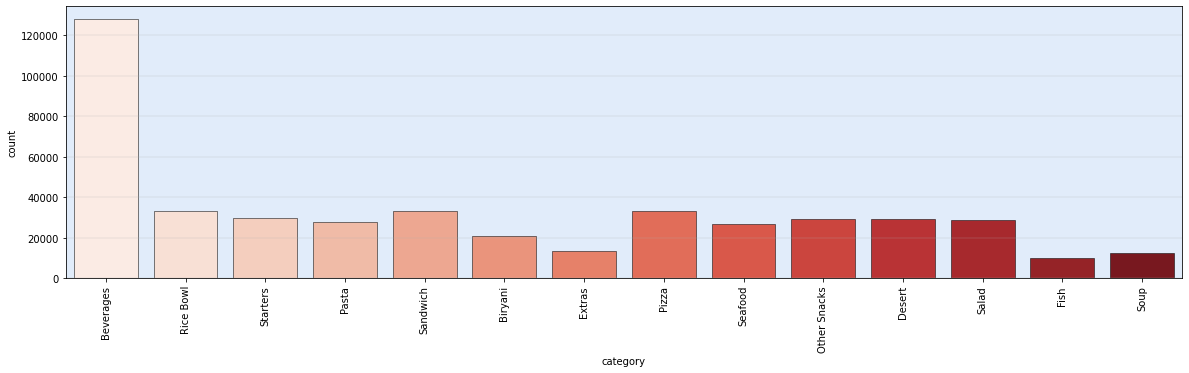

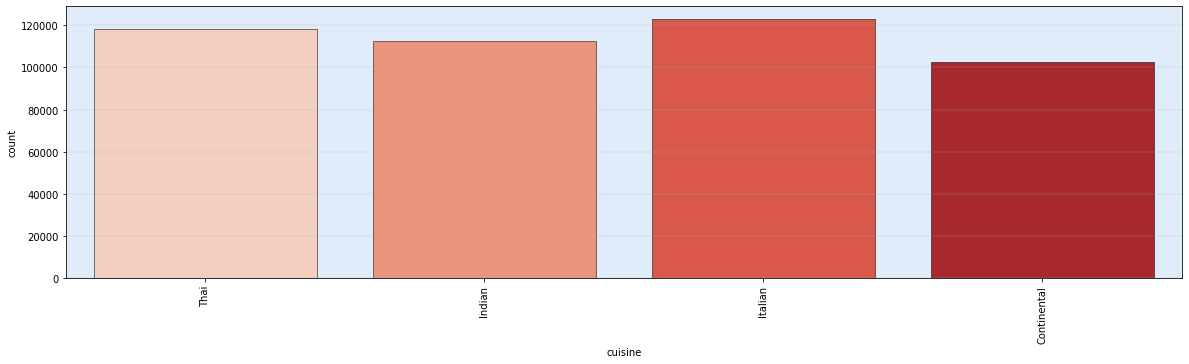

In [30]:
for col in obj_names:
    count_percentage(df, col)

Text(0.5, 1.0, 'Base price of cuisines')

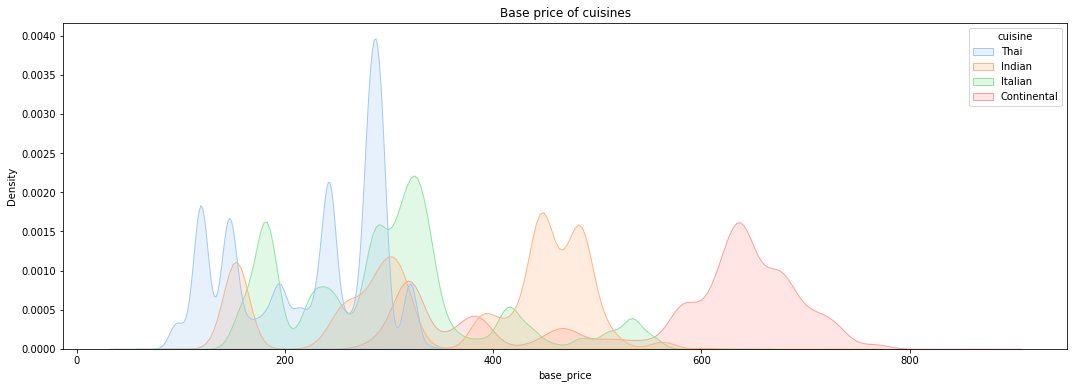

In [31]:
# ax = plt.axes()
# ax.set_facecolor('black')
sns.kdeplot(x= df['base_price'], hue= df['cuisine'], fill= True, palette= palette_light)
plt.title('Base price of cuisines')

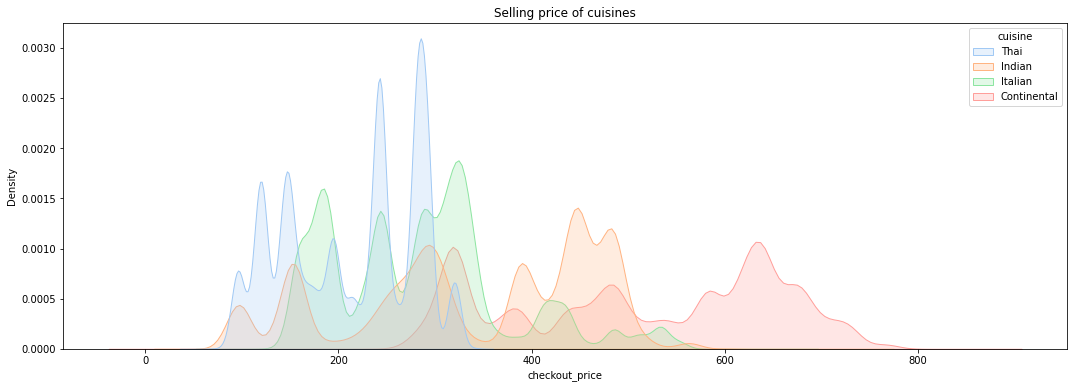

In [32]:
# ax = plt.axes()
# ax.set_facecolor('white')
sns.kdeplot(x= df['checkout_price'], hue= df['cuisine'], fill= True, palette= palette_light)
plt.title('Selling price of cuisines');

##### Continental cuisine seems to the most expensive, whereas Thai cuisine sells at cheapest rate.
##### This might explain the number of outliers in Thai and Indian cuisine and opposite in case Continental cuisine.

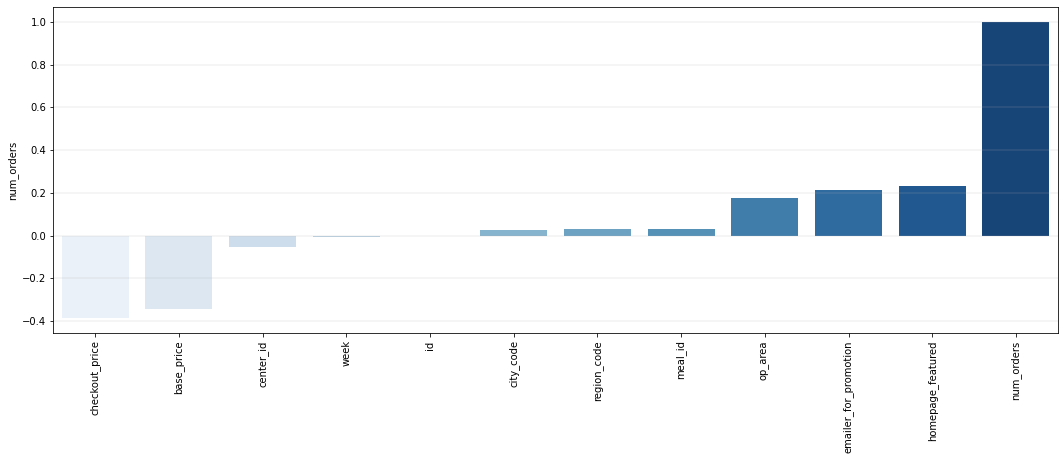

In [33]:
corr_df = df[['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
           'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
           'region_code', 'op_area']]

sns.barplot(y = corr_df.corr(method= 'spearman')['num_orders'].sort_values(),
            x= corr_df.corr(method= 'spearman')['num_orders'].sort_values().index,
            palette = palette_b)
plt.grid(axis= 'y', linewidth = 0.25)
plt.xticks(rotation=90);

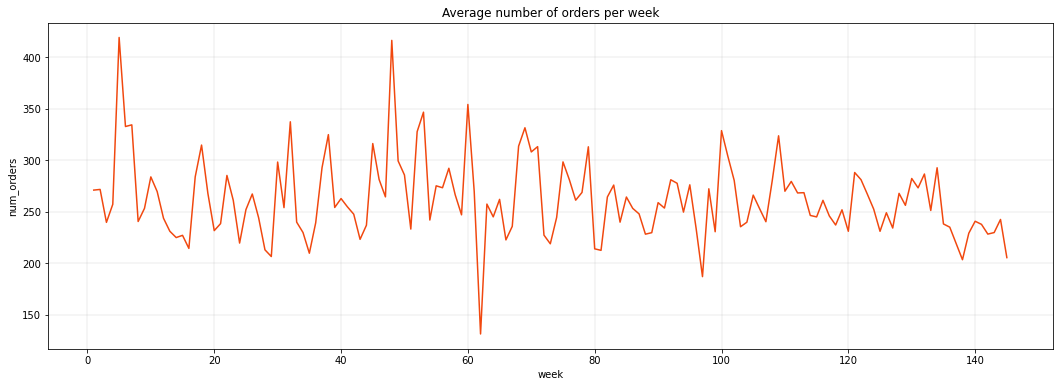

In [34]:
sns.lineplot(data=((df.groupby('week').mean()['num_orders'])),color='#F1480F') 
plt.grid(linewidth = 0.25)
plt.title('Average number of orders per week');

### Feature engineering

In [35]:
# Creating discount column that will show collective effect of base_price and checkout_price column.

df['total_discount'] = ((df['base_price']-df['checkout_price'])/df['base_price'])*100

In [36]:
df['num_orders'].idxmax()

137437

In [37]:
print(df.iloc[137437])

id                         1452474
week                             5
center_id                       43
meal_id                       2290
checkout_price              159.08
base_price                  311.43
emailer_for_promotion            1
homepage_featured                1
num_orders                   24299
city_code                      590
region_code                     56
center_type                 TYPE_A
op_area                        5.1
category                 Rice Bowl
cuisine                     Indian
total_discount             48.9195
Name: 137437, dtype: object


In [38]:
# Seasonal (according to quarters) cuisines and categorical meals

def quarters(week):
    if (week < 13) or (week > 48 and week < 61) or (week > 96 and week < 109):
        return "Q1"
    elif (week > 12 and week < 25) or (week > 60 and week < 73) or (week > 108 and week < 121):
        return "Q2"
    elif (week > 24 and week < 37) or (week > 72 and week < 85) or (week > 120 and week < 133):
        return "Q3" 
    else:
        return "Q4"

df['quarter'] = np.vectorize(quarters)(df['week'])

In [39]:
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,total_discount,quarter
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,10.151684,Q1
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai,10.808326,Q1
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai,0.746714,Q1
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai,-0.741510,Q1
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai,0.677966,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental,7.533345,Q4
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental,0.171812,Q4
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental,-0.344216,Q4
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental,-0.172108,Q4


In [40]:
# feature between meal and week

season_df = df.groupby(['meal_id', 'week', 'quarter'])['id'].count().reset_index() 
season_df.rename(columns={'id':'seasonal_meal'}, inplace=True)
df = pd.merge(df,season_df, on=['meal_id', 'week', 'quarter'], how='left')

In [41]:
season_df

,meal_id,week,quarter,seasonal_meal
0,1062,1,Q1,77
1,1062,2,Q1,77
2,1062,3,Q1,77
3,1062,4,Q1,77
4,1062,5,Q1,76
...,...,...,...,...
7168,2956,141,Q4,44
7169,2956,142,Q4,38
7170,2956,143,Q4,41
7171,2956,144,Q4,43


In [42]:
# Places where there will be high demand for some meals based on the season and location.

local_demand = df.groupby(['center_id', 'meal_id', 'quarter'])['id'].count().reset_index()
local_demand.rename(columns={'id':'local_demand'}, inplace=True)
df = pd.merge(df,local_demand, on=['center_id', 'meal_id', 'quarter'], how='left')

In [43]:
local_demand

,center_id,meal_id,quarter,local_demand
0,10,1062,Q1,36
1,10,1062,Q2,36
2,10,1062,Q3,36
3,10,1062,Q4,37
4,10,1109,Q1,36
...,...,...,...,...
14288,186,2867,Q4,24
14289,186,2956,Q1,11
14290,186,2956,Q2,15
14291,186,2956,Q3,8


In [44]:
# Places where there will be high demand for some meals based on the season and location.

regional_demand = df.groupby(['region_code', 'meal_id', 'quarter'])['id'].count().reset_index()
regional_demand.rename(columns={'id':'regional_demand'}, inplace=True)
df = pd.merge(df, regional_demand,
              on=['region_code', 'meal_id', 'quarter'], how='left')

In [45]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,total_discount,quarter,seasonal_meal,local_demand,regional_demand
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,10.151684,Q1,77,36,1079
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai,10.808326,Q1,77,36,1079
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai,0.746714,Q1,77,36,1079
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai,-0.741510,Q1,77,36,1079
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai,0.677966,Q1,76,36,1079


In [46]:
# Some centers and food id are featured in home page these is can be highly ordered because of advertisement

homepage_feat = df.groupby(['center_id','meal_id'])['homepage_featured'].mean().reset_index()
homepage_feat.rename(columns= {'homepage_featured':'avg_homepage_featured'}, inplace = True)
df = pd.merge(df,homepage_feat, on=['center_id','meal_id'], how='left')

In [47]:
# Some regions and food id are featured in home page these is can be highly ordered because of advertisement

reg_homepage_feat = df.groupby(['region_code','meal_id'])['homepage_featured'].mean().reset_index()
reg_homepage_feat.rename(columns= {'homepage_featured':'reg_homepage_feat'}, inplace = True)
df = pd.merge(df, reg_homepage_feat, on=['region_code','meal_id'], how='left')

In [48]:
# Some centers and food id are promoted by email these can be highly ordered because of that.

email_promo = df.groupby(['center_id','meal_id'])['emailer_for_promotion'].mean().reset_index()
email_promo.rename(columns={'emailer_for_promotion':'avg_email_promo'}, inplace = True)
df = pd.merge(df,email_promo, on=['center_id','meal_id'], how='left')

In [49]:
# Some centers and food id are promoted by email these can be highly ordered because of that.

reg_email_promo = df.groupby(['region_code','meal_id'])['emailer_for_promotion'].mean().reset_index()
reg_email_promo.rename(columns={'emailer_for_promotion':'reg_email_promo'}, inplace = True)
df = pd.merge(df, reg_email_promo, on=['region_code','meal_id'], how='left')

In [50]:
# Distribution of numerical data.

norm_df = df.select_dtypes(include='number')
norm_df.skew().sort_values()

local_demand            -2.439605
seasonal_meal           -1.816024
regional_demand         -0.664735
city_code               -0.209131
meal_id                 -0.172884
week                    -0.049517
id                      -0.001102
region_code              0.056254
center_id                0.345130
base_price               0.637661
op_area                  0.664414
checkout_price           0.672330
reg_homepage_feat        1.101991
reg_email_promo          1.333837
avg_email_promo          1.350950
total_discount           1.997170
avg_homepage_featured    2.383456
homepage_featured        2.506022
emailer_for_promotion    3.067713
num_orders               6.929966
dtype: float64

##### Data is right skewed, need to perform log transformations before using statistics based algorithms.

#### Fearure engineering on final (submission) test-data

In [51]:
# Discount feature
test_df['total_discount'] = ((test_df['base_price']-test_df['checkout_price'])/test_df['base_price'])*100


# Feature 'Quarter'
test_df['quarter'] = np.vectorize(quarters)(test_df['week'])


# feature between meal and week
season_df = test_df.groupby(['meal_id', 'week', 'quarter'])['id'].count().reset_index() 
season_df.rename(columns={'id':'seasonal_meal'}, inplace=True)
test_df = pd.merge(test_df, season_df, on=['meal_id', 'week', 'quarter'], how='left')


# Places where there will be high demand for some meals based on the season and location.
local_demand = test_df.groupby(['center_id', 'meal_id', 'quarter'])['id'].count().reset_index()
local_demand.rename(columns={'id':'local_demand'}, inplace=True)
test_df = pd.merge(test_df, local_demand, on=['center_id', 'meal_id', 'quarter'], how='left')


# Places where there will be high demand for some meals based on the season and location.
regional_demand = test_df.groupby(['region_code', 'meal_id', 'quarter'])['id'].count().reset_index()
regional_demand.rename(columns={'id':'regional_demand'}, inplace=True)
test_df = pd.merge(test_df, regional_demand, on=['region_code', 'meal_id', 'quarter'], how='left')


# Some centers and food id are featured in home page these is can be highly ordered because of advertisement
homepage_feat = test_df.groupby(['center_id','meal_id'])['homepage_featured'].mean().reset_index()
homepage_feat.rename(columns= {'homepage_featured':'avg_homepage_featured'}, inplace = True)
test_df = pd.merge(test_df, homepage_feat, on=['center_id','meal_id'], how='left')


# Some regions and food id are featured in home page these is can be highly ordered because of advertisement

reg_homepage_feat = test_df.groupby(['region_code','meal_id'])['homepage_featured'].mean().reset_index()
reg_homepage_feat.rename(columns= {'homepage_featured':'reg_homepage_feat'}, inplace = True)
test_df = pd.merge(test_df, reg_homepage_feat, on=['region_code','meal_id'], how='left')


# Some centers and food id are promoted by email these can be highly ordered because of that.

email_promo = test_df.groupby(['center_id','meal_id'])['emailer_for_promotion'].mean().reset_index()
email_promo.rename(columns={'emailer_for_promotion':'avg_email_promo'}, inplace = True)
test_df = pd.merge(test_df,email_promo, on=['center_id','meal_id'], how='left')


# Some centers and food id are promoted by email these can be highly ordered because of that.

reg_email_promo = test_df.groupby(['region_code','meal_id'])['emailer_for_promotion'].mean().reset_index()
reg_email_promo.rename(columns={'emailer_for_promotion':'reg_email_promo'}, inplace = True)
test_df = pd.merge(test_df, reg_email_promo, on=['region_code','meal_id'], how='left')


In [52]:
test_df1 = test_df.copy()

### ML

In [53]:
train = df.copy()

In [54]:
from sklearn.preprocessing import FunctionTransformer

# Applying log transformation on right skewed features num_orders.

trf = FunctionTransformer(func = np.log1p)
train['num_orders'] = trf.fit_transform(train['num_orders'])

# correlation
abs(train.corr()['num_orders']).sort_values()

id                       0.001355
week                     0.008401
region_code              0.029817
meal_id                  0.029933
city_code                0.030381
avg_email_promo          0.045189
reg_email_promo          0.055655
center_id                0.055720
reg_homepage_feat        0.154302
total_discount           0.164188
avg_homepage_featured    0.178165
op_area                  0.195314
regional_demand          0.222826
emailer_for_promotion    0.227997
homepage_featured        0.248957
base_price               0.329608
checkout_price           0.389443
seasonal_meal            0.407960
local_demand             0.437156
num_orders               1.000000
Name: num_orders, dtype: float64

<AxesSubplot:>

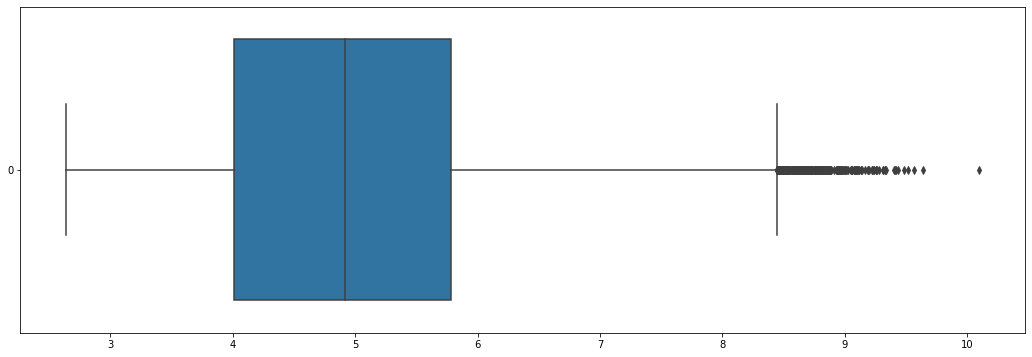

In [55]:
sns.boxplot(data=train['num_orders'],orient='h')

In [56]:
# IQR
Q1 = np.percentile(train['num_orders'], 25, method= 'midpoint')
 
Q3 = np.percentile(train['num_orders'], 75, method= 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", train.shape)
 
# Upper bound
upper = np.where(train['num_orders'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(train['num_orders'] <= (Q1-1.5*IQR))
 
### Removing the Outliers
train.drop(upper[0], inplace = True)
train.drop(lower[0], inplace = True)
 
print("New Shape: ", train.shape)

Old Shape:  (456548, 24)
New Shape:  (456220, 24)


### Encoding categorical values

In [57]:
# Mapping center type

map_center = {'TYPE_C':0, 'TYPE_B':1, 'TYPE_A':2}
train['center_type'] = train['center_type'].map(map_center)


# Mapping quarters

map_Q = {'Q1':0, 'Q2':1, 'Q3':2, 'Q4':3}
train['quarter'] = train['quarter'].map(map_Q)

### One hot encoding 

In [58]:
# For algorithms than don't support categorical features.
train_0 = train.copy()



cat_col = train_0[['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine']]
cat_col['center_id'] = cat_col['center_id'].astype('object')
cat_col['meal_id'] = cat_col['meal_id'].astype('object')
cat_col['city_code'] = cat_col['city_code'].astype('object')
cat_col['region_code'] = cat_col['region_code'].astype('object')

num_col = train_0[['id', 'week', 'checkout_price', 'base_price','emailer_for_promotion', 
              'homepage_featured', 'num_orders', 'center_type', 'op_area', 
              'total_discount', 'quarter', 'seasonal_meal', 'local_demand','regional_demand', 
              'avg_homepage_featured', 'reg_homepage_feat', 'avg_email_promo', 'reg_email_promo']]

dummies = pd.get_dummies(cat_col, drop_first= True)
train_1 = pd.concat([num_col, dummies], axis =1)

In [59]:
train_1.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,center_type,op_area,total_discount,quarter,seasonal_meal,local_demand,regional_demand,avg_homepage_featured,reg_homepage_feat,avg_email_promo,reg_email_promo,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,...,city_code_614,city_code_615,city_code_620,city_code_628,city_code_632,city_code_638,city_code_647,city_code_648,city_code_649,city_code_651,city_code_654,city_code_658,city_code_659,city_code_675,city_code_676,city_code_679,city_code_680,city_code_683,city_code_685,city_code_693,city_code_695,city_code_698,city_code_699,city_code_700,city_code_702,city_code_703,city_code_713,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1379560,1,136.83,152.29,0,0,5.181784,0,2.0,10.151684,0,77,36,1079,0.062069,0.314977,0.013793,0.015207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1018704,2,135.83,152.29,0,0,5.780744,0,2.0,10.808326,0,77,36,1079,0.062069,0.314977,0.013793,0.015207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1196273,3,132.92,133.92,0,0,4.574711,0,2.0,0.746714,0,77,36,1079,0.062069,0.314977,0.013793,0.015207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1116527,4,135.86,134.86,0,0,5.099866,0,2.0,-0.741510,0,77,36,1079,0.062069,0.314977,0.013793,0.015207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1343872,5,146.50,147.50,0,0,5.375278,0,2.0,0.677966,0,76,36,1079,0.062069,0.314977,0.013793,0.015207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [60]:
train_1.shape

(456220, 217)

In [61]:
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [64]:
def pred_results(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    

    print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('RMSLE: ', mean_squared_log_error(y_test,y_pred))

In [65]:
feats_to_scale = ['checkout_price', 'base_price', 'total_discount', 
                  'seasonal_meal', 'local_demand', 'regional_demand']

scaler = StandardScaler()

def scaling_fun(col):
    train_1[col] = scaler.fit_transform(train_1[[col]])

for col in feats_to_scale:
    scaling_fun(col)

In [66]:
train_1

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,center_type,op_area,total_discount,quarter,seasonal_meal,local_demand,regional_demand,avg_homepage_featured,reg_homepage_feat,avg_email_promo,reg_email_promo,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,...,city_code_614,city_code_615,city_code_620,city_code_628,city_code_632,city_code_638,city_code_647,city_code_648,city_code_649,city_code_651,city_code_654,city_code_658,city_code_659,city_code_675,city_code_676,city_code_679,city_code_680,city_code_683,city_code_685,city_code_693,city_code_695,city_code_698,city_code_699,city_code_700,city_code_702,city_code_703,city_code_713,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1379560,1,-1.278365,-1.255948,0,0,5.181784,0,2.0,0.393105,0,0.676872,0.485787,1.219501,0.062069,0.314977,0.013793,0.015207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1018704,2,-1.284904,-1.255948,0,0,5.780744,0,2.0,0.451056,0,0.676872,0.485787,1.219501,0.062069,0.314977,0.013793,0.015207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1196273,3,-1.303931,-1.370218,0,0,4.574711,0,2.0,-0.436926,0,0.676872,0.485787,1.219501,0.062069,0.314977,0.013793,0.015207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1116527,4,-1.284708,-1.364371,0,0,5.099866,0,2.0,-0.568268,0,0.676872,0.485787,1.219501,0.062069,0.314977,0.013793,0.015207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1343872,5,-1.215138,-1.285744,0,0,5.375278,0,2.0,-0.442993,0,0.601145,0.485787,1.219501,0.062069,0.314977,0.013793,0.015207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,1.639105,1.718920,0,1,2.639057,2,4.5,0.162025,3,-2.352232,-1.684311,-1.584484,0.132530,0.062500,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
456544,1060716,142,1.626028,1.417229,0,0,3.761200,2,4.5,-0.487663,3,-2.276504,-1.684311,-1.584484,0.132530,0.062500,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
456545,1029231,143,1.639105,1.411008,0,0,3.713572,2,4.5,-0.533205,3,-2.276504,-1.684311,-1.584484,0.132530,0.06250

In [67]:
X = train_1.drop(columns= ['id', 'num_orders'])
y = train_1['num_orders']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 100)

### Base linear regession model

In [72]:
base_elastic = ElasticNet()

base_elastic.fit(X_train, y_train)

ElasticNet()

In [73]:
pred_results(base_elastic, X_test, y_test)

RMSE:  1.1932903062439215
RMSLE:  0.04546805345161589


In [75]:
base_elastic.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

#### Grid-search

In [80]:
elastic_model1 = ElasticNet()
param_grid = {'alpha':[0.001,0.0025,0.005,0.0075,0.01,0.05,0.075,0.25,0.5],
              'l1_ratio':[0.001,0.0025,0.005,0.0075,0.01,0.1,1]}


grid_model = GridSearchCV(estimator=elastic_model1,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=3)    

grid_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.0025, 0.005, 0.0075, 0.01, 0.05,
                                   0.075, 0.25, 0.5],
                         'l1_ratio': [0.001, 0.0025, 0.005, 0.0075, 0.01, 0.1,
                                      1]},
             scoring='neg_mean_squared_error')

In [81]:
pred_results(grid_model, X_test, y_test)

RMSE:  0.6120725475692879
RMSLE:  0.013244725767541538


In [82]:
grid_model.best_params_ # Final model 

{'alpha': 0.001, 'l1_ratio': 0.001}

### Random forest regressor model

In [192]:
rfr_base = RandomForestRegressor(random_state= 100)

rfr_base.fit(X_train,y_train)

RandomForestRegressor(random_state=100)

In [193]:
pred_results(rfr_base, X_test, y_test)

RMSE:  0.47020768469252316
RMSLE:  0.008533984739193387


In [194]:
rfr_base.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

### Gradient-Boosting model

In [195]:
gbr = GradientBoostingRegressor(random_state= 100)

gbr.fit(X_train,y_train)

GradientBoostingRegressor(random_state=100)

In [196]:
pred_results(gbr,X_test, y_test)

RMSE:  0.6078483206751836
RMSLE:  0.012894561683066977


In [197]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 100,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### XGBoost model

In [198]:
import lightgbm as lgb
from xgboost import XGBRegressor 
from catboost import CatBoostRegressor

In [199]:
xgb_base = XGBRegressor(random_state = 100,
                        n_jobs = -1)

xgb_base.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=100,
             reg_alpha=0, reg_lambda=1, ...)

In [200]:
pred_results(xgb_base,X_test, y_test)

RMSE:  0.4916981315959742
RMSLE:  0.009013002795091816


### LGBM model

In [201]:
lgb_base = lgb.LGBMRegressor(random_state = 100)

lgb_base.fit(X_train,y_train)

LGBMRegressor(random_state=100)

In [202]:
pred_results(lgb_base, X_test, y_test)

RMSE:  0.5265152909088731
RMSLE:  0.010112005023014702


In [203]:
lgb_base.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 100,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

### Cat-Boost model

In [204]:
# with one-hot encoding might not work well

cbr_base = CatBoostRegressor(loss_function='RMSE',
                          random_seed=100,
                          verbose=100,
                          task_type= 'GPU')

cbr_base.fit(X_train, y_train)

Learning rate set to 0.087492
0:	learn: 1.1380382	total: 32.7ms	remaining: 32.7s
100:	learn: 0.5823448	total: 1.17s	remaining: 10.4s
200:	learn: 0.5469782	total: 2.28s	remaining: 9.08s
300:	learn: 0.5270411	total: 3.42s	remaining: 7.95s
400:	learn: 0.5139269	total: 4.56s	remaining: 6.81s
500:	learn: 0.5041966	total: 5.7s	remaining: 5.67s
600:	learn: 0.4968928	total: 6.83s	remaining: 4.54s
700:	learn: 0.4908499	total: 7.96s	remaining: 3.39s
800:	learn: 0.4854805	total: 9.1s	remaining: 2.26s
900:	learn: 0.4810106	total: 10.2s	remaining: 1.12s
999:	learn: 0.4771299	total: 11.3s	remaining: 0us


In [205]:
pred_results(cbr_base,X_test,y_test)

RMSE:  0.4808443093222861
RMSLE:  0.008738097735310067


### Label encoding for catboost.

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
# Features to encode 'category', 'cuisine'

le_cat = LabelEncoder()
train['category'] = le_cat.fit_transform(train['category'])


le_cui = LabelEncoder()
train['cuisine'] = le_cui.fit_transform(train['cuisine'])


In [98]:
train.corr(method= 'spearman')['num_orders'].sort_values()

checkout_price          -0.387372
base_price              -0.343987
center_id               -0.054538
week                    -0.007982
quarter                 -0.005697
id                      -0.001635
city_code                0.025482
category                 0.025629
region_code              0.028591
meal_id                  0.030374
center_type              0.042534
avg_email_promo          0.104275
reg_homepage_feat        0.114322
reg_email_promo          0.117361
total_discount           0.120153
avg_homepage_featured    0.161423
op_area                  0.175262
cuisine                  0.193558
emailer_for_promotion    0.209163
homepage_featured        0.230983
regional_demand          0.284264
local_demand             0.526848
seasonal_meal            0.608757
num_orders               1.000000
Name: num_orders, dtype: float64

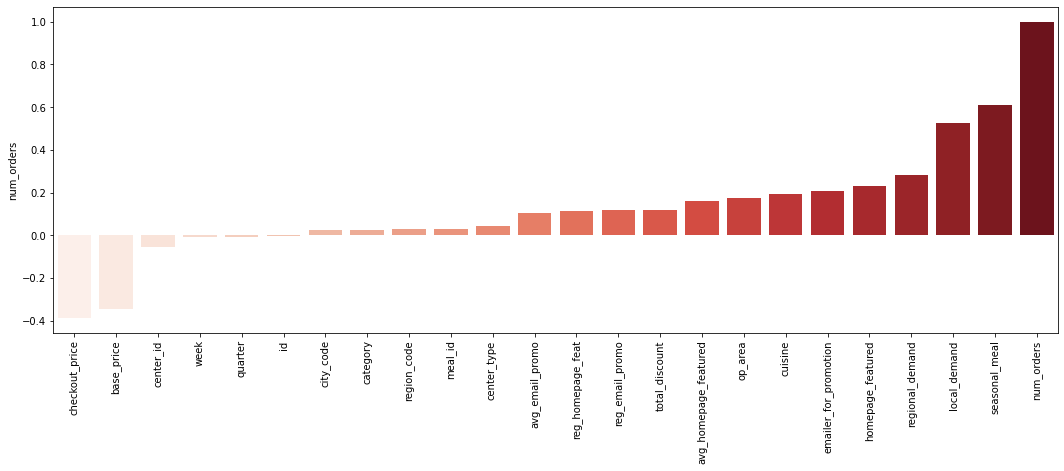

In [99]:
sns.barplot(y=train.corr(method= 'spearman')['num_orders'].sort_values(),
            x=train.corr(method= 'spearman')['num_orders'].sort_values().index,
            palette=palette_r)
plt.xticks(rotation=90);

In [100]:
train['center_type'] = train['center_type'].astype('object')
train['quarter'] = train['quarter'].astype('object')
train['cuisine'] = train['cuisine'].astype('object')
train['category'] = train['category'].astype('object')
train['meal_id'] = train['meal_id'].astype('object')
train['center_id'] = train['center_id'].astype('object')
train['city_code'] = train['city_code'].astype('object')
train['region_code'] = train['region_code'].astype('object')

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456220 entries, 0 to 456547
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456220 non-null  int64  
 1   week                   456220 non-null  int64  
 2   center_id              456220 non-null  object 
 3   meal_id                456220 non-null  object 
 4   checkout_price         456220 non-null  float64
 5   base_price             456220 non-null  float64
 6   emailer_for_promotion  456220 non-null  int64  
 7   homepage_featured      456220 non-null  int64  
 8   num_orders             456220 non-null  float64
 9   city_code              456220 non-null  object 
 10  region_code            456220 non-null  object 
 11  center_type            456220 non-null  object 
 12  op_area                456220 non-null  float64
 13  category               456220 non-null  object 
 14  cuisine                456220 non-nu

In [102]:
X = train.drop(columns=['num_orders','id'])
y = train['num_orders']

## Base Model

In [103]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 100)

In [104]:
cat_features = np.where(X.dtypes == object)[0]

In [105]:
cbr_0 = CatBoostRegressor(loss_function='RMSE',
                          iterations = 1500,
                          random_seed=100,
                          verbose=100,
                          task_type= 'GPU')

In [106]:
cbr_0.fit(X_train,y_train,cat_features=cat_features)

Learning rate set to 0.068682
0:	learn: 1.1495381	total: 79.3ms	remaining: 1m 58s
100:	learn: 0.5418589	total: 7.83s	remaining: 1m 48s
200:	learn: 0.5163386	total: 15.2s	remaining: 1m 38s
300:	learn: 0.5046668	total: 22.6s	remaining: 1m 29s
400:	learn: 0.4968060	total: 29.9s	remaining: 1m 21s
500:	learn: 0.4909873	total: 37.1s	remaining: 1m 13s
600:	learn: 0.4861106	total: 44.3s	remaining: 1m 6s
700:	learn: 0.4822441	total: 51.5s	remaining: 58.7s
800:	learn: 0.4788250	total: 58.7s	remaining: 51.2s
900:	learn: 0.4759516	total: 1m 5s	remaining: 43.8s
1000:	learn: 0.4734266	total: 1m 13s	remaining: 36.4s
1100:	learn: 0.4710913	total: 1m 20s	remaining: 29.1s
1200:	learn: 0.4689486	total: 1m 27s	remaining: 21.8s
1300:	learn: 0.4670495	total: 1m 34s	remaining: 14.5s
1400:	learn: 0.4651976	total: 1m 42s	remaining: 7.22s
1499:	learn: 0.4634949	total: 1m 49s	remaining: 0us


In [107]:
pred_results(cbr_0, X_test, y_test)

RMSE:  0.4642849882926189
RMSLE:  0.008235982981816516


##### Base Cat-boost model is giving the best results.

In [108]:
feature_imp = cbr_0.feature_importances_
feature_imp = feature_imp.tolist()

feature_names = cbr_0.feature_names_

feat_df = pd.DataFrame({'features':feature_names,'score':feature_imp})
feat_df

,features,score
0,week,3.147128
1,center_id,10.397589
2,meal_id,11.935570
3,checkout_price,9.007190
4,base_price,1.780818
5,emailer_for_promotion,3.154695
6,homepage_featured,5.403363
7,city_code,0.925264
8,region_code,0.434893
9,center_type,2.461854


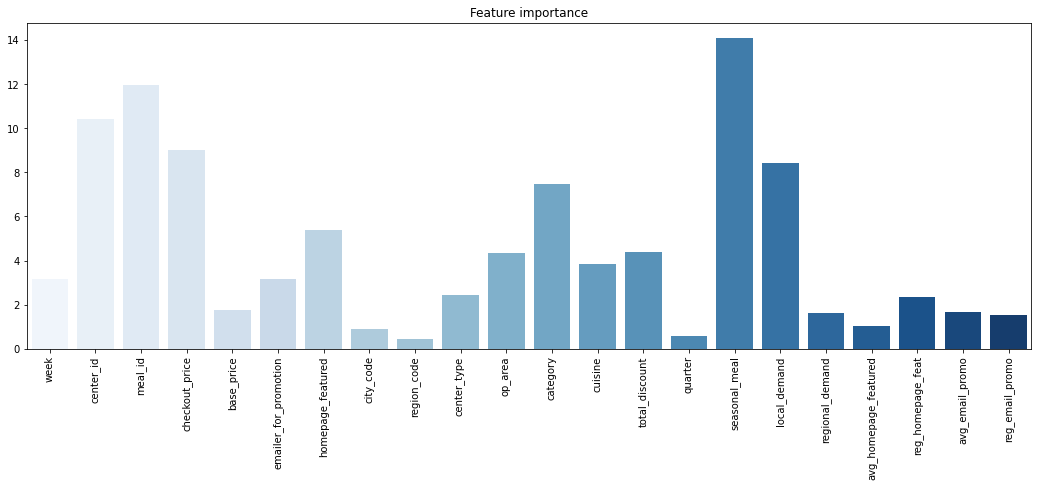

In [109]:
sns.barplot(x= cbr_0.feature_names_, y= cbr_0.feature_importances_, palette=palette_b)      
plt.xticks(rotation=90)
plt.title('Feature importance');

In [110]:
cbr_0.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'RMSE',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1500,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'boosting_type': 'Plain',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=

### Catboost Grid-Search

In [290]:
cbr_1 = CatBoostRegressor(loss_function='RMSE',
                          random_seed=100,
                          iterations= 1500,
                          cat_features= cat_features,
                          learning_rate = 0.035,
                          verbose=500,
                          task_type= 'GPU')


param_grid = {'depth':[4,8,10],
             'l2_leaf_reg': [2,4,8]}

gscv = GridSearchCV(estimator=cbr_1,
                    param_grid=param_grid,
                    cv=3)

gscv.fit(X_train,y_train)

0:	learn: 1.1768681	total: 34.5ms	remaining: 51.7s
500:	learn: 0.5366198	total: 14.8s	remaining: 29.5s
1000:	learn: 0.5155836	total: 29.4s	remaining: 14.7s
1499:	learn: 0.5049082	total: 43.9s	remaining: 0us
0:	learn: 1.1757262	total: 32ms	remaining: 48s
500:	learn: 0.5351884	total: 14.8s	remaining: 29.5s
1000:	learn: 0.5142021	total: 29.1s	remaining: 14.5s
1499:	learn: 0.5042201	total: 43.9s	remaining: 0us
0:	learn: 1.1767805	total: 39ms	remaining: 58.4s
500:	learn: 0.5358540	total: 15.4s	remaining: 30.7s
1000:	learn: 0.5149178	total: 30s	remaining: 15s
1499:	learn: 0.5044689	total: 44.5s	remaining: 0us
0:	learn: 1.1768707	total: 36.3ms	remaining: 54.5s
500:	learn: 0.5365220	total: 14.8s	remaining: 29.5s
1000:	learn: 0.5158774	total: 29.1s	remaining: 14.5s
1499:	learn: 0.5053617	total: 43.7s	remaining: 0us
0:	learn: 1.1757285	total: 33.2ms	remaining: 49.8s
500:	learn: 0.5354288	total: 15s	remaining: 29.9s
1000:	learn: 0.5143058	total: 29.5s	remaining: 14.7s
1499:	learn: 0.5045719	total

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001C41BB39820>,
             param_grid={'depth': [4, 8, 10], 'l2_leaf_reg': [2, 4, 8]})

In [291]:
pred_results(gscv, X_test, y_test)

RMSE:  0.4496154059777752
RMSLE:  0.007832155468816349


In [292]:
gscv.best_params_

{'depth': 10, 'l2_leaf_reg': 2}

#### 2 nd grid-search

In [295]:
cbr_2 = CatBoostRegressor(loss_function='RMSE',
                          random_seed=100,
                          iterations= 1500,
                          cat_features= cat_features,
                          learning_rate = 0.035,
                          l2_leaf_reg = 2,
                          verbose=500,
                          task_type= 'GPU')


param_grid_2 = {'depth':[11,12,13,14,15]}

gscv_2 = GridSearchCV(estimator=cbr_2,
                    param_grid=param_grid_2,
                    cv=3)

gscv_2.fit(X_train,y_train)

0:	learn: 1.1707383	total: 130ms	remaining: 3m 15s
500:	learn: 0.4604950	total: 52.8s	remaining: 1m 45s
1000:	learn: 0.4318666	total: 1m 46s	remaining: 53s
1499:	learn: 0.4122386	total: 2m 40s	remaining: 0us
0:	learn: 1.1693130	total: 105ms	remaining: 2m 36s
500:	learn: 0.4587238	total: 52.5s	remaining: 1m 44s
1000:	learn: 0.4310914	total: 1m 45s	remaining: 52.5s
1499:	learn: 0.4114409	total: 2m 39s	remaining: 0us
0:	learn: 1.1696403	total: 116ms	remaining: 2m 53s
500:	learn: 0.4583846	total: 53.7s	remaining: 1m 47s
1000:	learn: 0.4298773	total: 1m 47s	remaining: 53.7s
1499:	learn: 0.4100734	total: 2m 42s	remaining: 0us
0:	learn: 1.1699781	total: 139ms	remaining: 3m 29s
500:	learn: 0.4472132	total: 1m 7s	remaining: 2m 15s
1000:	learn: 0.4132732	total: 2m 16s	remaining: 1m 7s
1499:	learn: 0.3888270	total: 3m 25s	remaining: 0us
0:	learn: 1.1688215	total: 139ms	remaining: 3m 27s
500:	learn: 0.4457841	total: 1m 7s	remaining: 2m 14s
1000:	learn: 0.4132144	total: 2m 16s	remaining: 1m 7s
1499

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001C428DE0AC0>,
             param_grid={'depth': [11, 12, 13, 14, 15]})

In [296]:
pred_results(gscv_2, X_test, y_test)

RMSE:  0.44106141872655236
RMSLE:  0.0076140765171197515


In [297]:
gscv_2.best_params_

{'depth': 13}

### Final Cat-boost model

#### Training model on full data.

In [310]:
cbr_3 = CatBoostRegressor(loss_function='RMSE',
                          random_seed=100,
                          iterations= 1500,
                          cat_features= cat_features,
                          learning_rate = 0.035,
                          l2_leaf_reg = 2,
                          depth = 13,
                          verbose=200,
                          task_type= 'GPU')

cbr_3.fit(X, y)

0:	learn: 1.1694395	total: 322ms	remaining: 8m 3s
200:	learn: 0.4756702	total: 50.1s	remaining: 5m 23s
400:	learn: 0.4495921	total: 1m 39s	remaining: 4m 33s
600:	learn: 0.4336663	total: 2m 31s	remaining: 3m 45s
800:	learn: 0.4214667	total: 3m 22s	remaining: 2m 56s
1000:	learn: 0.4111525	total: 4m 14s	remaining: 2m 7s
1200:	learn: 0.4022362	total: 5m 6s	remaining: 1m 16s
1400:	learn: 0.3939079	total: 5m 58s	remaining: 25.3s
1499:	learn: 0.3901327	total: 6m 24s	remaining: 0us


In [312]:
import pickle

In [313]:
pickle.dump(cbr_3, open('catboost_reg.pkl', 'wb'))

# test data set

In [123]:
print('k')

k


In [124]:
test_df1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,total_discount,quarter,seasonal_meal,local_demand,regional_demand,avg_homepage_featured,reg_homepage_feat,avg_email_promo,reg_email_promo
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,0.628496,Q4,77,9,299,0.0,0.297659,0.0,0.0
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,0.000000,Q4,77,9,299,0.0,0.297659,0.0,0.0
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai,0.632351,Q4,77,9,299,0.0,0.297659,0.0,0.0
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai,-1.272750,Q4,77,9,299,0.0,0.297659,0.0,0.0
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,-0.628496,Q4,77,9,299,0.0,0.297659,0.0,0.0


In [126]:
test_df1['category'] = le_cat.fit_transform(test_df1['category'])

test_df1['cuisine'] = le_cui.fit_transform(test_df1['cuisine'])

In [127]:
test_df1.drop(columns=['id'], inplace=True)

In [128]:
test_df1['quarter'] = test_df1['quarter'].astype('object')
test_df1['center_type'] = test_df1['center_type'].astype('object')
test_df1['cuisine'] = test_df1['cuisine'].astype('object')
test_df1['category'] = test_df1['category'].astype('object')
test_df1['meal_id'] = test_df1['meal_id'].astype('object')
test_df1['center_id'] = test_df1['center_id'].astype('object')
test_df1['city_code'] = test_df1['city_code'].astype('object')
test_df1['region_code'] = test_df1['region_code'].astype('object')


cat_features_test = np.where(test_df1.dtypes == object)[0]

In [302]:
test['num_orders'] = cbr_3.predict(test_df1)
test['num_orders'] = np.expm1(test['num_orders']).astype('int64')
submission_cat = test.copy()
submission_cat = submission_cat[['id','num_orders']]

### Submission

In [303]:
submission_cat.to_csv('submission_cat.csv', index=False)